In [ ]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


# ***Dataset***

In [ ]:
milestone_dir = '/content/drive/MyDrive/DataSet/Milestone 1'
template_dir = '/content/drive/MyDrive/DataSet/Template images'

# ***Milestone images***

In [ ]:
milestone_images = os.listdir(milestone_dir)
len(milestone_images)

6

In [ ]:
template_images = os.listdir(template_dir)
len(template_images)

12

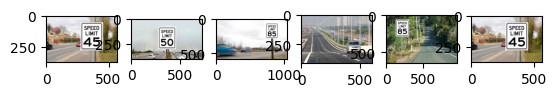

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 6)
axs = axs.flatten()
for i in range (len(milestone_images)):
    file_path = (os.path.join(milestone_dir, milestone_images[i]))
    img = Image.open(file_path)
    axs[i].imshow(img)
plt.show()

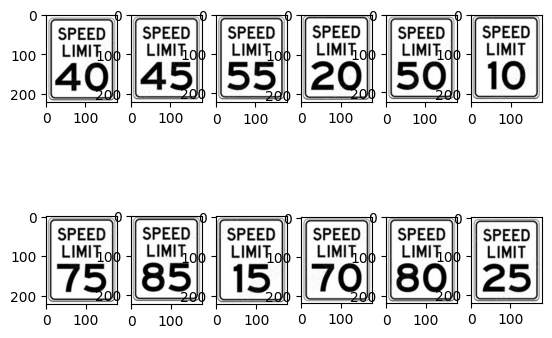

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 6)
axs = axs.flatten()
for i in range (len(template_images)):
    file_path = (os.path.join(template_dir, template_images[i]))
    img = Image.open(file_path)
    axs[i].imshow(img)
plt.show()

In [ ]:
milestone_images = sorted([f for f in os.listdir(milestone_dir) if f.endswith(('.jpg', '.png'))])
template_images = [f for f in os.listdir(template_dir) if f.endswith(('.jpg', '.png'))]

# ***Model for detection***

In [ ]:
output = []

# Step 4: Loop through milestone images
for milestone_fname in milestone_images:
    milestone_path = os.path.join(milestone_dir, milestone_fname)
    milestone_img = cv2.imread(milestone_path, cv2.IMREAD_GRAYSCALE)

    if milestone_img is None:
        print(f"Error loading image: {milestone_fname}")
        continue

    found_speed_limit = None

    # Step 5: Initialize flag to check if speed limit found
    speed_limit_found = False

    # Step 6: Loop through template images for template matching
    for template_fname in template_images:
        template_path = os.path.join(template_dir, template_fname)
        template_img = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)

        if template_img is None:
            print(f"Error loading template image: {template_fname}")
            continue

        # Perform template matching
        result = cv2.matchTemplate(milestone_img, template_img, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        # Adjust threshold as needed, currently set to 0.99 for demonstration
        threshold = 0.99
        if max_val >= threshold:
            found_speed_limit = int(template_fname.split('-')[1].split('.')[0])
            speed_limit_found = True
            break

    # Step 7: Append result to output list
    output.append([milestone_fname, found_speed_limit])

    # Step 8: If no speed limit found, append None to output list
    if not speed_limit_found:
        print(f"No speed limit sign found for {milestone_fname}")

# Step 9: Convert output to DataFrame
output_df = pd.DataFrame(output, columns=['Image name', 'Speed limit'])

# Step 10: Save output to CSV
output_csv_path = 'M1_Output.csv'
output_df.to_csv(output_csv_path, index=False)

# Step 11: Display the CSV file content
print(f"Output saved to {output_csv_path}:")
print(output_df)

No speed limit sign found for Picture5.jpg
Output saved to M1_Output.csv:
     Image name  Speed limit
0  Picture1.jpg         45.0
1  Picture2.jpg         50.0
2  Picture3.jpg         85.0
3  Picture4.jpg         85.0
4  Picture5.jpg          NaN


# ***OUTPUT***

In [ ]:

output_df = pd.DataFrame(output, columns=['Image name', 'Speed limit'])
output_df.to_csv('M1_Output.csv', index=False)

# Download the CSV file (optional step for Google Colab)
from google.colab import files
files.download('M1_Output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>